Cargamos las librerias necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from ecgdetectors import Detectors
import neurokit2 as nk
import scipy.stats as stats

Procedemos a cargar una señal de prueba

In [2]:
signal = pd.read_csv(r'C:\Users\ctama\OneDrive\Desktop\Bioseñales\Proyecto\Datos\ECGDataDenoised\ECGDataDenoised\MUSE_20180112_072334_92000.csv',delimiter=',',names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
signal.head()

I       II      III      aVR      aVL      aVF      V1      V2  \
0  15.09900  18.8630   6.0265 -16.8650   6.4281  12.6200  63.415  309.29   
1  -0.90122   6.7116   9.8809  -2.4466  -4.3630   7.6742  67.313  296.48   
2 -11.90100  -1.1695  13.0050   7.2656 -12.1130   4.6749  71.575  284.55   
3 -14.84500  -1.8601  15.2640   9.2450 -15.0920   5.1219  76.289  273.73   
4  -9.76580   5.1719  17.2220   3.2335 -13.5520   9.5552  81.121  263.57   

       V3      V4       V5      V6  
0  380.54  362.11  144.980 -41.718  
1  359.36  339.65  128.270 -48.142  
2  338.77  319.45  114.380 -53.749  
3  318.93  302.74  104.880 -58.090  
4  299.52  289.44   99.613 -61.295

In [ ]:
datos = pd.read_excel(r'C:\Users\ctama\OneDrive\Desktop\Bioseñales\Proyecto\Datos\Diagnostics.xlsx')
datos.head()

FileName Rhythm       Beat  PatientAge  Gender  \
0  MUSE_20180113_171327_27000   AFIB   RBBB TWC          85    MALE   
1  MUSE_20180112_073319_29000     SB        TWC          59  FEMALE   
2  MUSE_20180111_165520_97000     SA       NONE          20  FEMALE   
3  MUSE_20180113_121940_44000     SB       NONE          66    MALE   
4  MUSE_20180112_122850_57000     AF  STDD STTC          73  FEMALE   

   VentricularRate  AtrialRate  QRSDuration  QTInterval  QTCorrected  RAxis  \
0              117         234          114         356          496     81   
1               52          52           92         432          401     76   
2               67          67           82         382          403     88   
3               53          53           96         456          427     34   
4              162         162          114         252          413     68   

   TAxis  QRSCount  QOnset  QOffset  TOffset  
0    -27        19     208      265      386  
1     42         8     215      261      431  
2     20        11     224      265      415  
3      3         9     219      267      447  
4    -40        26     228      285      354

Vemos una breve descripcion de las arritmias para poder seleccionar los 40 registros

In [4]:
datos.groupby(by=["Rhythm"]).describe()

PatientAge                                                       \
            count       mean        std   min    25%   50%   75%   max   
Rhythm                                                                   
AF          445.0  71.065169  13.497673  21.0  63.00  72.0  81.0  97.0   
AFIB       1780.0  73.359551  11.137343  30.0  67.00  75.0  82.0  98.0   
AT          121.0  65.719008  19.300787   8.0  60.00  71.0  77.0  94.0   
AVNRT        16.0  57.875000  17.335417  27.0  51.00  59.0  66.0  84.0   
AVRT          8.0  57.500000  16.835337  25.0  47.75  62.5  67.0  77.0   
SA          399.0  34.746867  23.029446   4.0  14.50  29.0  52.5  93.0   
SAAWR         7.0  51.142857  31.829905  15.0  22.50  49.0  81.0  87.0   
SB         3889.0  58.339676  13.952579  10.0  50.00  60.0  68.0  98.0   
SR         1826.0  54.352136  16.331977   4.0  44.00  55.0  66.0  95.0   
ST         1568.0  54.565051  21.060029   4.0  40.00  57.0  70.0  96.0   
SVT         587.0  55.623509  18.527343   4.0  42.00  56.0  69.0  96.0   

       VentricularRate              ... QOffset        TOffset              \
                 count        mean  ...     75%    max   count        mean   
Rhythm                              ...                                      
AF               445.0  114.577528  ...  272.00  314.0   445.0  392.907865   
AFIB            1780.0   95.489326  ...  269.00  311.0  1780.0  402.439888   
AT               121.0  116.438017  ...  267.00  294.0   121.0  387.388430   
AVNRT             16.0  172.250000  ...  271.00  316.0    16.0  359.062500   
AVRT               8.0  171.000000  ...  266.75  274.0     8.0  358.125000   
SA               399.0   72.922306  ...  266.50  299.0   399.0  411.834586   
SAAWR              7.0   64.428571  ...  266.00  274.0     7.0  423.428571   
SB              3889.0   55.022885  ...  269.00  314.0  3889.0  435.605554   
SR              1826.0   75.748083  ...  267.00  311.0  1826.0  413.105148   
ST              1568.0  112.157526  ...  266.00  303.0  1568.0  386.538265   
SVT              587.0  168.367973  ...  271.00  331.0   587.0  358.831346   

                                                       
              std    min    25%    50%     75%    max  
Rhythm                                                 
AF      34.783087  302.0  369.0  389.0  412.00  537.0  
AFIB    26.553652  307.0  385.0  403.0  420.00  562.0  
AT      25.048743  323.0  372.0  387.0  403.00  490.0  
AVNRT   10.009787  334.0  355.5  359.5  363.25  381.0  
AVRT    26.351674  318.0  338.0  364.0  378.25  390.0  
SA      15.496724  376.0  400.5  411.0  421.00  466.0  
SAAWR   15.576233  406.0  414.0  421.0  428.00  453.0  
SB      17.177428  385.0  424.0  434.0  445.00  582.0  
SR      14.925198  370.0  403.0  413.0  423.00  494.0  
ST      15.636704  328.0  377.0  387.0  395.00  559.0  
SVT     19.553825  281.0  347.0  359.0  371.00  475.0  

[11 rows x 96 columns]

Seleccionamos 40 muestras de dos arritmias, las cuales seran la arritmia AFIB y la SR, utilizamos un ramdom_state para que siempre tomen los mismos datos "aleatorios"

In [8]:
# Filtrar solo las filas que tengan la arritmia deseada
Sub_datos1 = datos[datos["Rhythm"] == 'AFIB']
Sub_datos2 = datos[datos["Rhythm"] == 'SR']

# Tomar 20 muestras aleatorias
datos1_sample = Sub_datos1.sample(n=20, random_state=25)  # random_state es opcional para reproducibilidad
datos2_sample = Sub_datos2.sample(n=20, random_state=25)  # random_state es opcional para reproducibilidad

Nombres1 = datos1_sample['FileName']
Nombres1 = Nombres1.reset_index(drop=True)
Nombres2 = datos2_sample['FileName']
Nombres2 = Nombres2.reset_index(drop=True)

print(Nombres1)

0     MUSE_20180113_122627_91000
1     MUSE_20180111_170148_98000
2     MUSE_20180113_123041_34000
3     MUSE_20180116_130337_63000
4     MUSE_20180114_080031_12000
5     MUSE_20180118_131341_65000
6     MUSE_20180113_132044_83000
7     MUSE_20180118_172418_35000
8     MUSE_20180114_070940_66000
9     MUSE_20180118_174037_65000
10    MUSE_20180113_184119_75000
11    MUSE_20180118_135048_94000
12    MUSE_20180118_175237_22000
13    MUSE_20180712_160553_03000
14    MUSE_20180112_073047_61000
15    MUSE_20180118_181843_53000
16    MUSE_20180114_121236_19000
17    MUSE_20180115_131148_82000
18    MUSE_20180114_171012_09000
19    MUSE_20180114_135101_39000
Name: FileName, dtype: object


### Arritmia AFIB

Graficamos las 20 señales del ECG con sus picos R, utilizando un ciclo for.

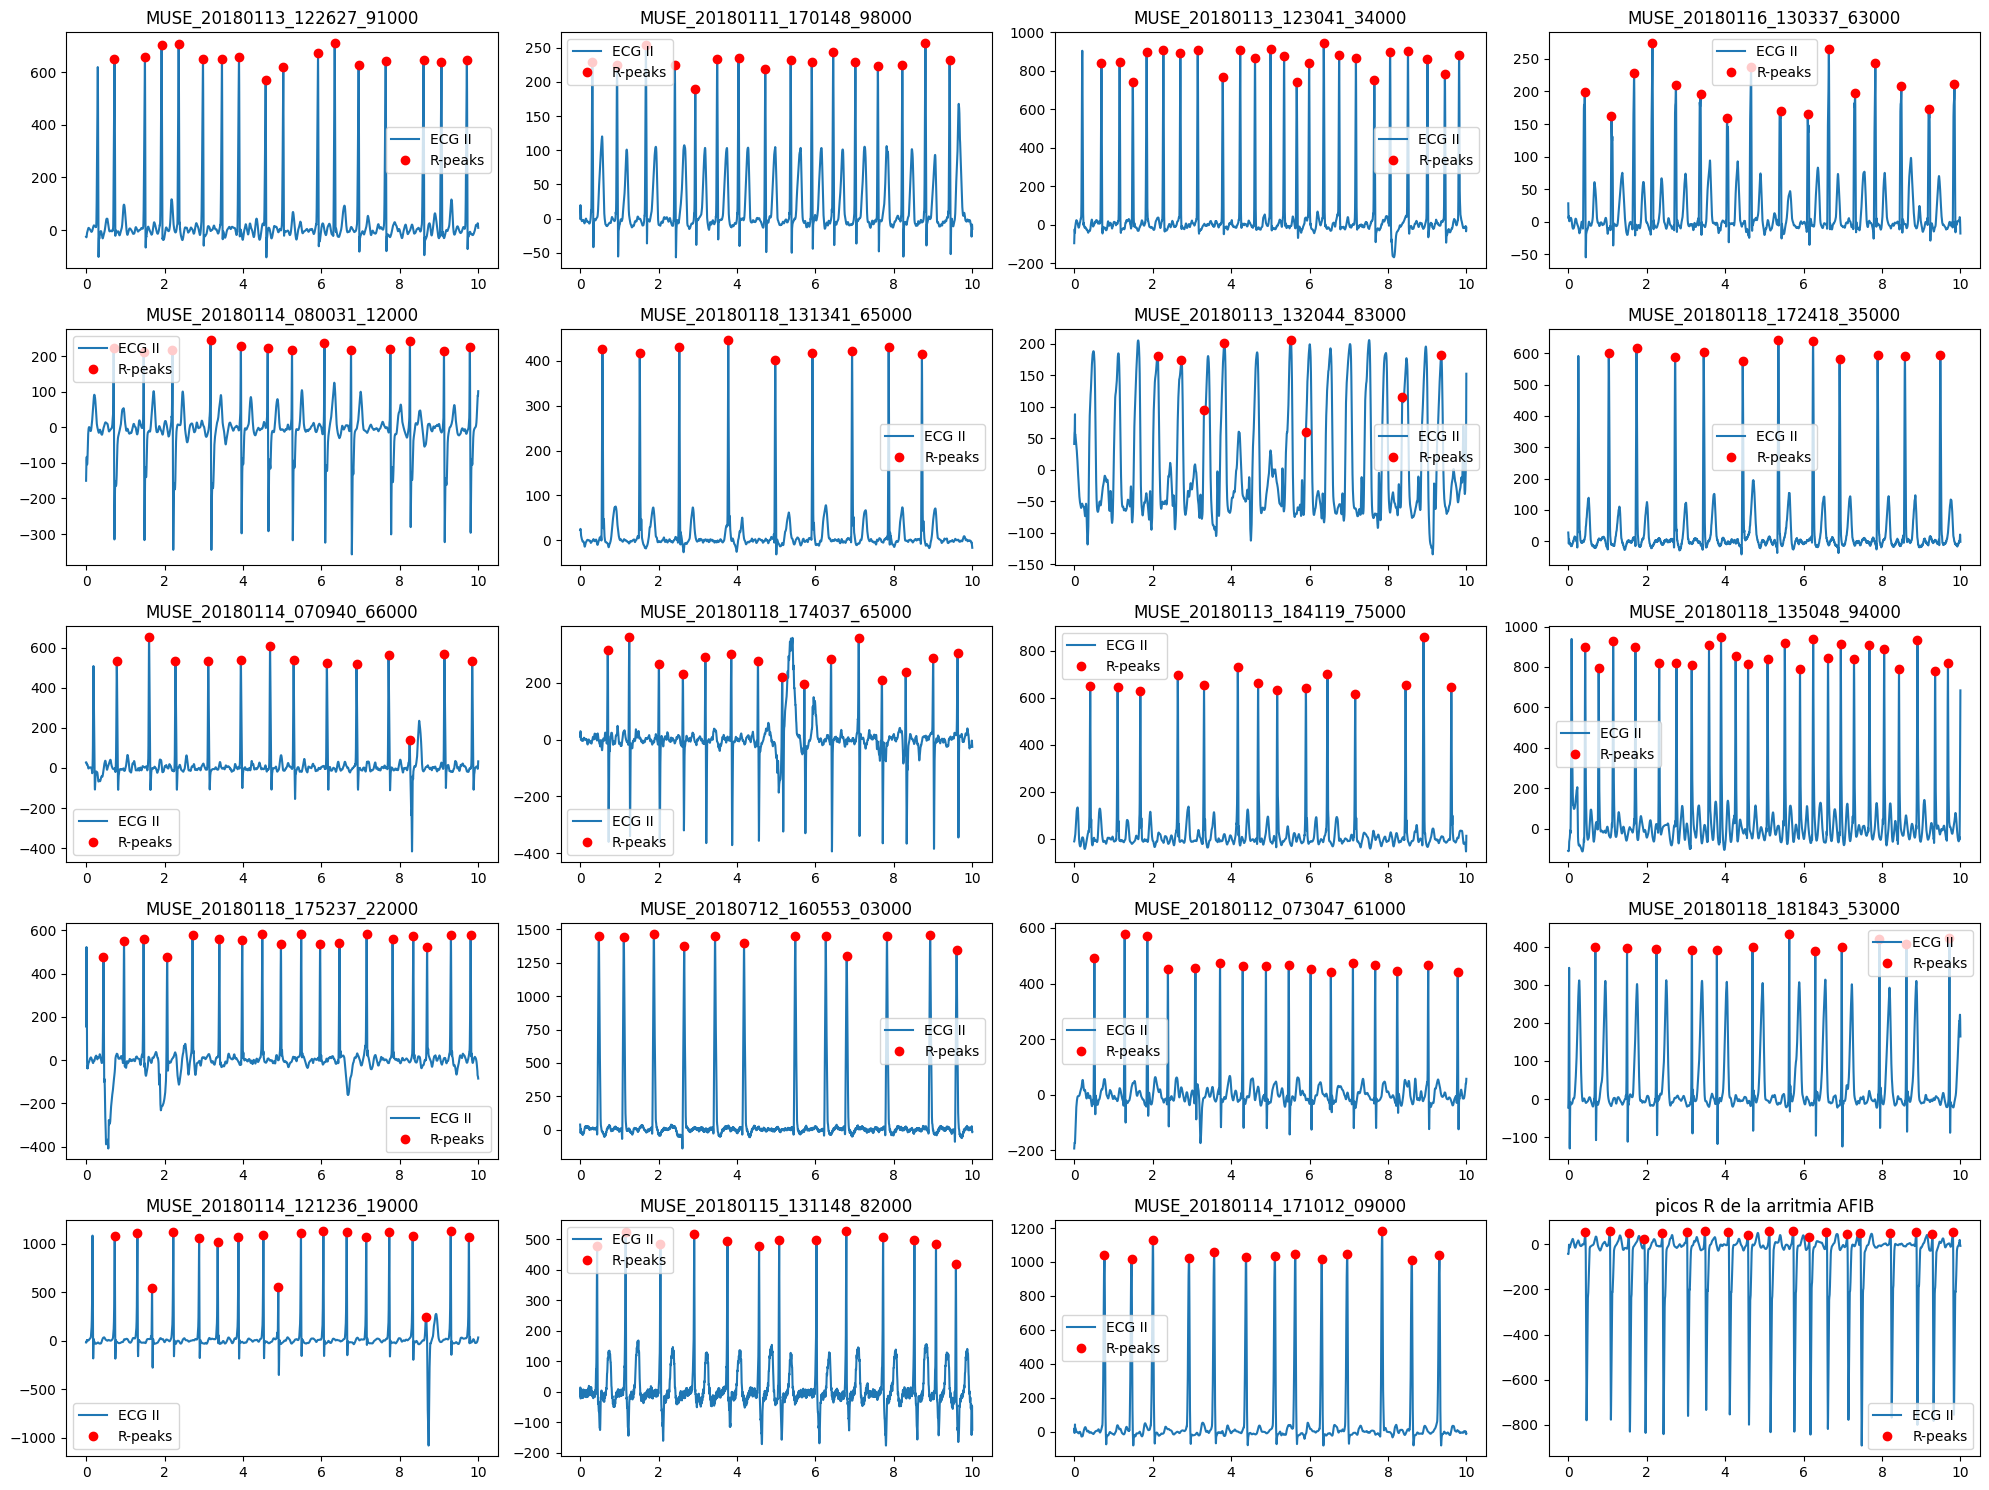

In [13]:
all_rpeaks1 = []  # Guardar los picos R de todos los archivos
fs = 500
num_signals = len(Nombres1)
cols = 4  # columnas de subplots
rows = int(np.ceil(num_signals / cols))  # número de filas

fig, axs = plt.subplots(rows, cols, figsize=(20, rows * 3), sharex=False)
axs = axs.flatten()

for i in range(num_signals):
    try:
        senal = pd.read_csv(
            r'C:\Users\ctama\OneDrive\Desktop\Bioseñales\Proyecto\Datos\ECGDataDenoised\ECGDataDenoised\\' +
            Nombres1[i] + '.csv',
            delimiter=',',
            names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
        )
        signal_ekg = senal['II'].values
        tiempo = np.arange(0, len(signal_ekg) / fs, 1 / fs)

        signals, rpeaks1 = nk.ecg_peaks(signal_ekg, sampling_rate=fs, correct_artifacts=False, show=False)
        all_rpeaks1.append(rpeaks1["ECG_R_Peaks"])

        axs[i].plot(tiempo, signal_ekg, label='ECG II')
        axs[i].plot(tiempo[rpeaks1["ECG_R_Peaks"]], signal_ekg[rpeaks1["ECG_R_Peaks"]], 'ro', label='R-peaks')
        axs[i].set_title(Nombres1[i])
        axs[i].legend()

    except Exception as e:
        print("Error leyendo archivo: " + Nombres1[i])
        axs[i].set_title(f"Error en {Nombres1[i]}")
        axs[i].axis('off')

# Ocultar subplots vacíos si hay menos de rows * cols
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.title("picos R de la arritmia AFIB")
plt.tight_layout()
plt.show()

### Arritmia SR

Graficamos las 20 señales del ECG con sus picos R, utilizando un ciclo for.

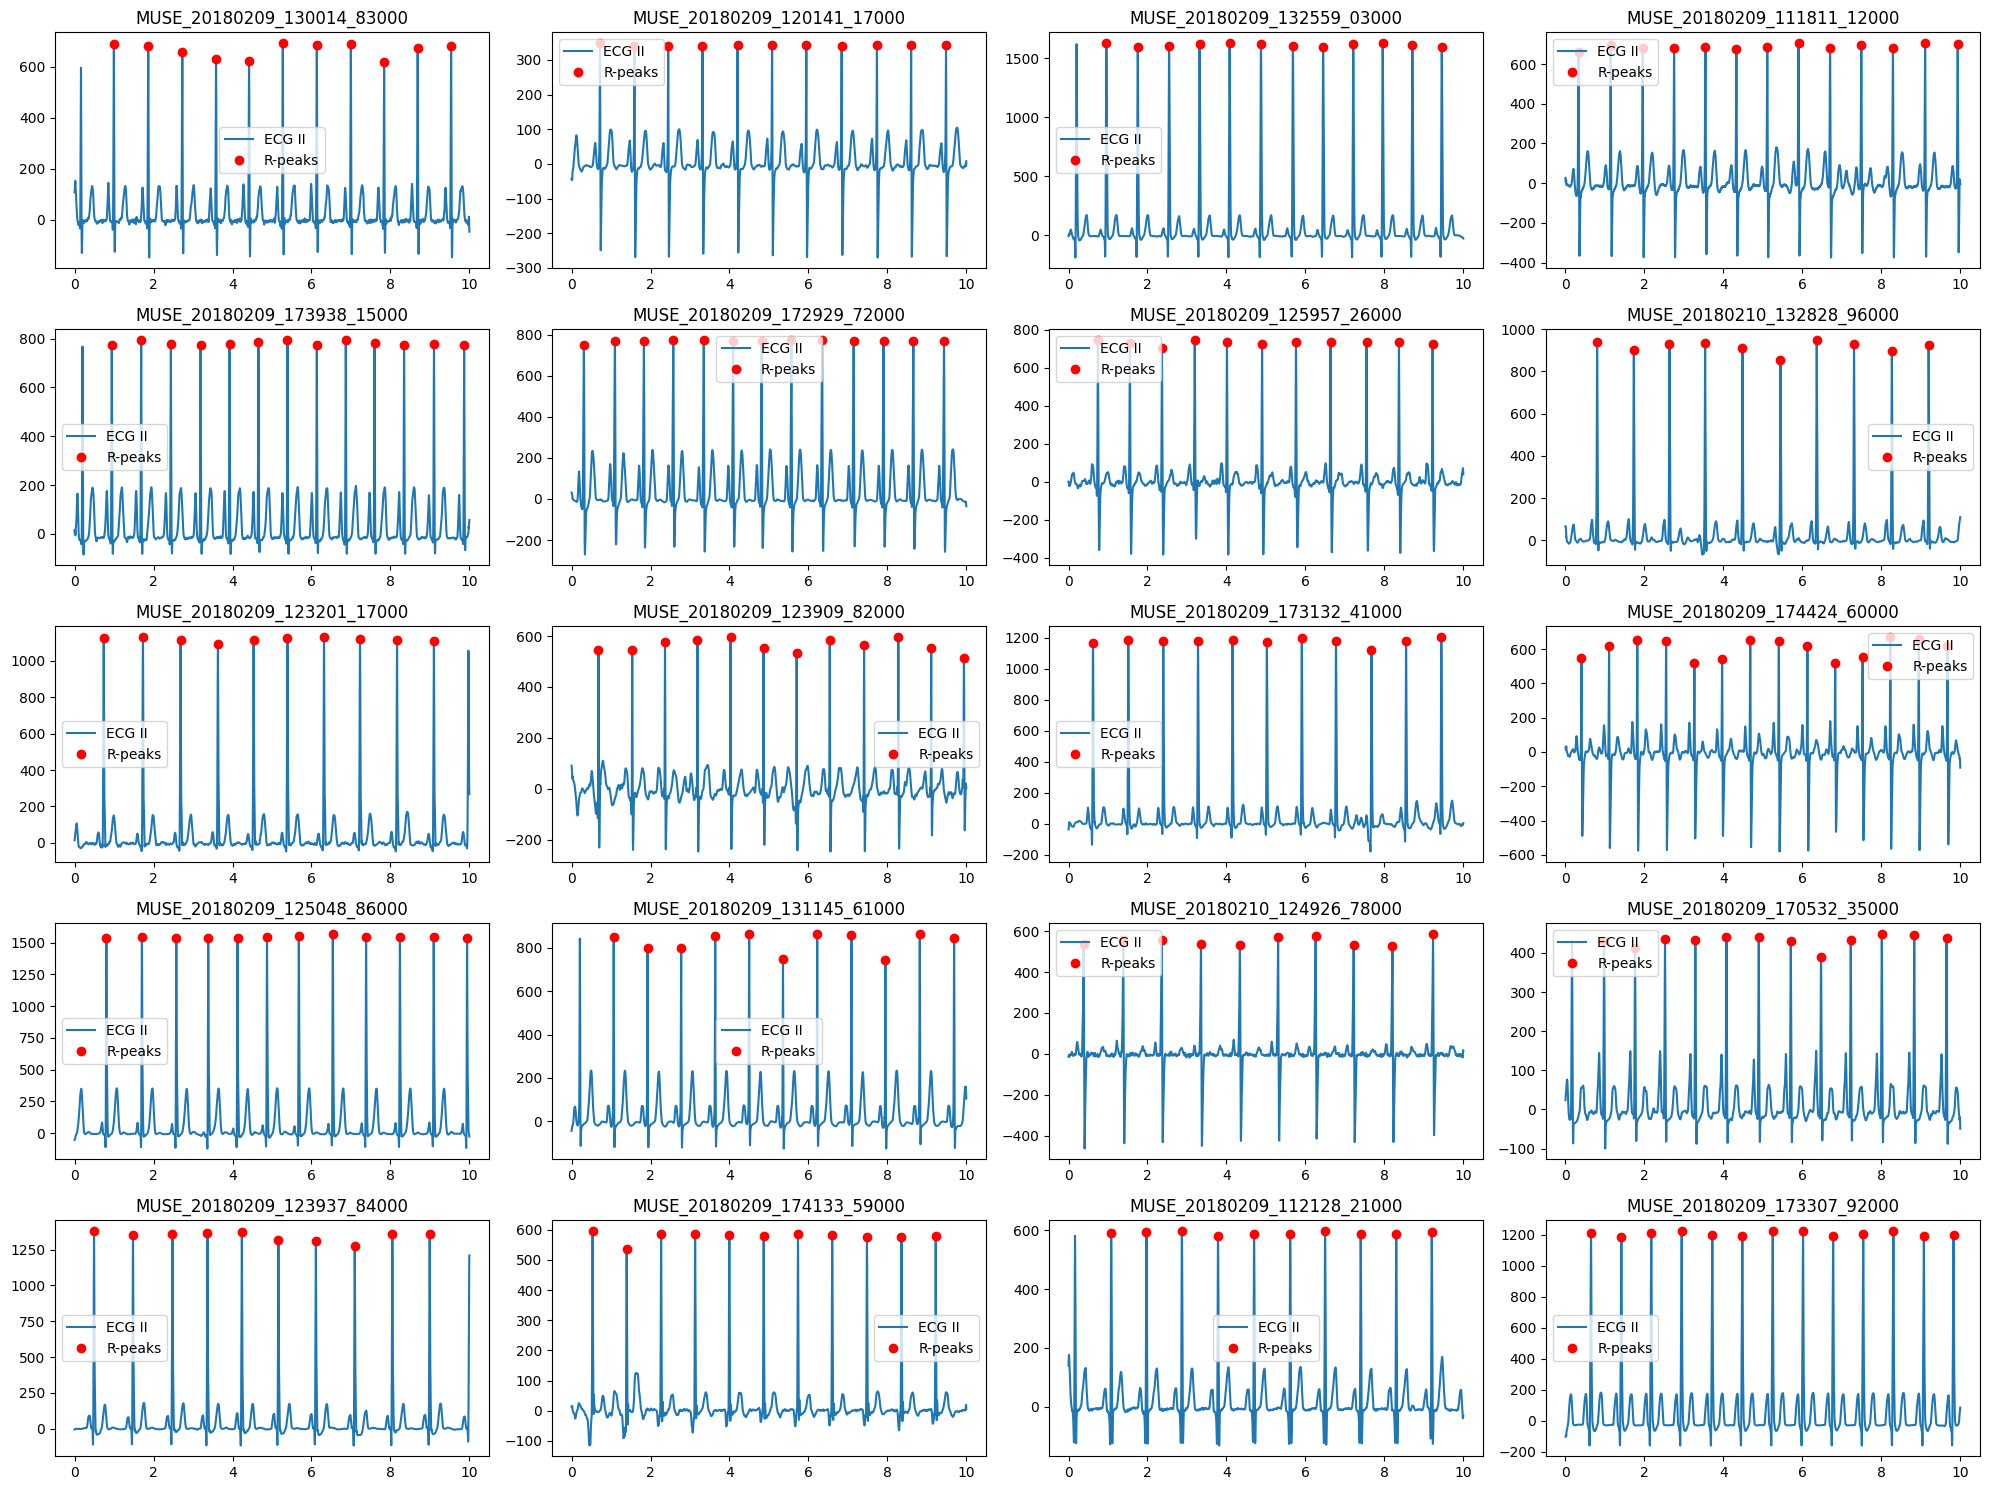

In [15]:
all_rpeaks1 = []  # Guardar los picos R de todos los archivos
fs = 500
num_signals = len(Nombres2)
cols = 4  # columnas de subplots
rows = int(np.ceil(num_signals / cols))  # número de filas

fig, axs = plt.subplots(rows, cols, figsize=(20, rows * 3), sharex=False)
axs = axs.flatten()

for i in range(num_signals):
    try:
        senal = pd.read_csv(
            r'C:\Users\ctama\OneDrive\Desktop\Bioseñales\Proyecto\Datos\ECGDataDenoised\ECGDataDenoised\\' +
            Nombres2[i] + '.csv',
            delimiter=',',
            names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
        )
        signal_ekg = senal['II'].values
        tiempo = np.arange(0, len(signal_ekg) / fs, 1 / fs)

        signals, rpeaks1 = nk.ecg_peaks(signal_ekg, sampling_rate=fs, correct_artifacts=False, show=False)
        all_rpeaks1.append(rpeaks1["ECG_R_Peaks"])

        axs[i].plot(tiempo, signal_ekg, label='ECG II')
        axs[i].plot(tiempo[rpeaks1["ECG_R_Peaks"]], signal_ekg[rpeaks1["ECG_R_Peaks"]], 'ro', label='R-peaks')
        axs[i].set_title(Nombres2[i])
        axs[i].legend()

    except Exception as e:
        print("Error leyendo archivo: " + Nombres2[i])
        axs[i].set_title(f"Error en {Nombres2[i]}")
        axs[i].axis('off')

# Ocultar subplots vacíos si hay menos de rows * cols
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

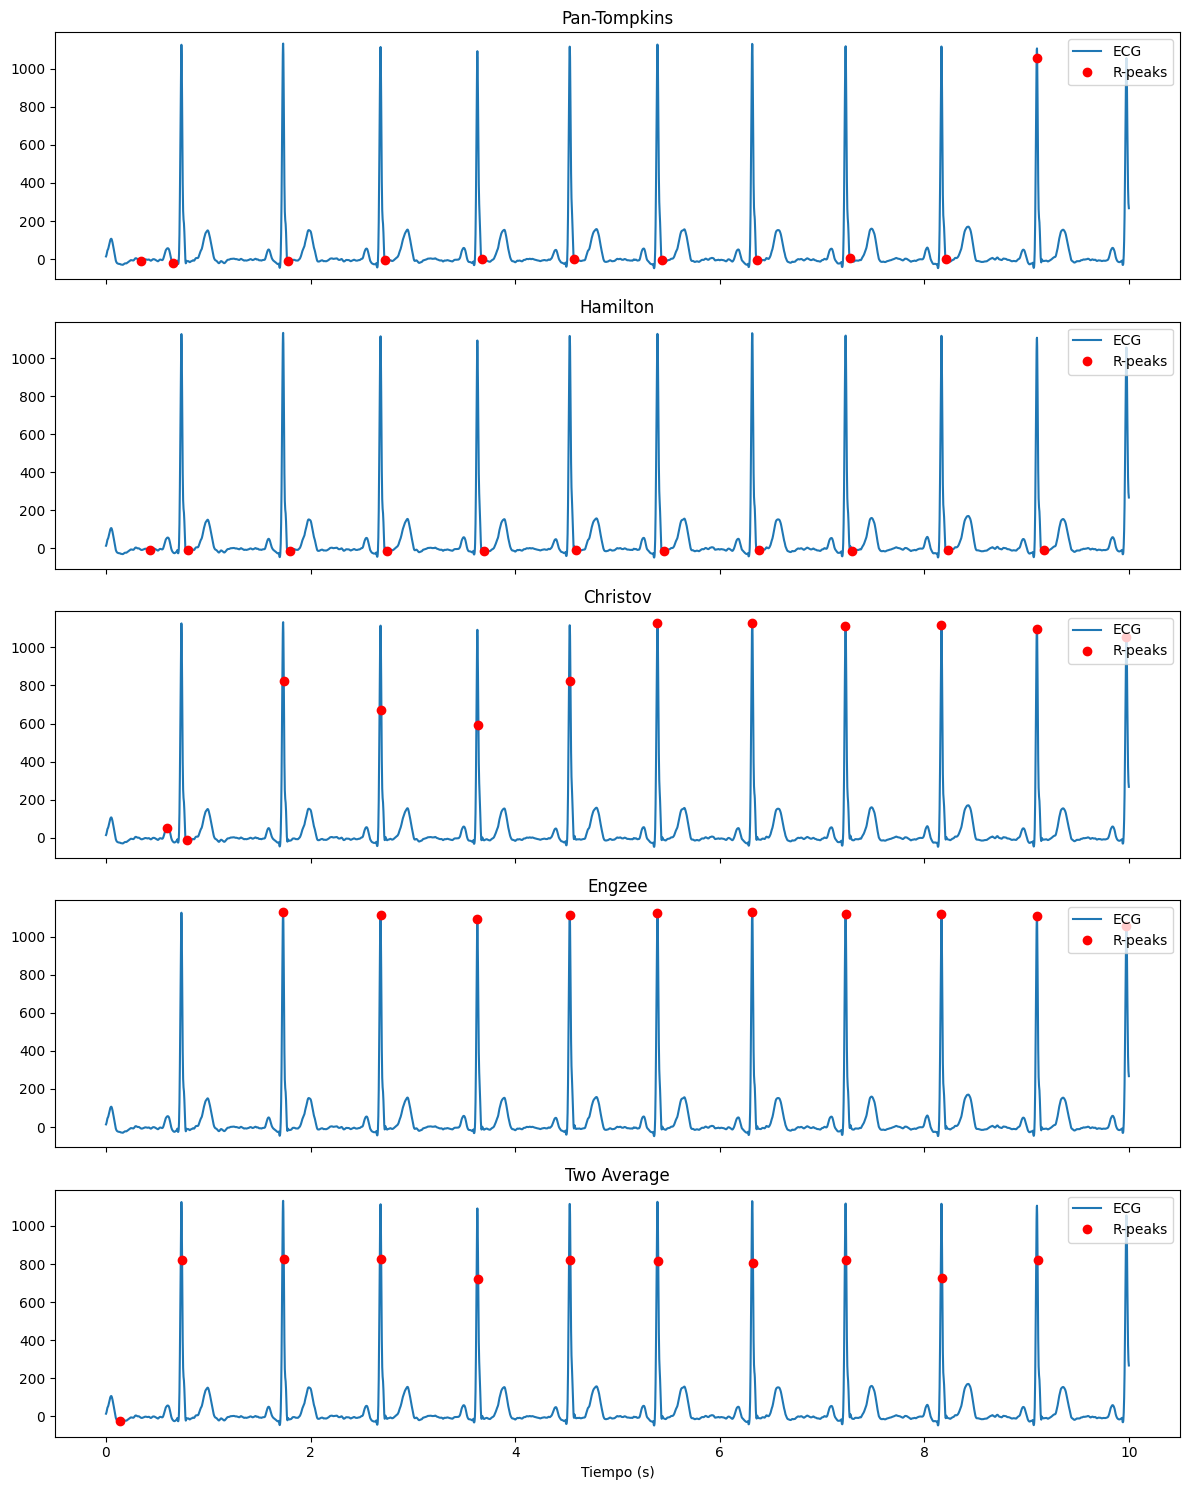

In [22]:
# Crear instancia del detector
detectors = Detectors(fs)

senalunica = pd.read_csv(
    r'C:\Users\ctama\OneDrive\Desktop\Bioseñales\Proyecto\Datos\ECGDataDenoised\ECGDataDenoised\\' +
    Nombres2[8] + '.csv',
    delimiter=',',
    names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
)
signal_ekg = senalunica['II'].values

# Lista de algoritmos a comparar
algoritmos = {
    "Pan-Tompkins": detectors.pan_tompkins_detector,
    "Hamilton": detectors.hamilton_detector,
    "Christov": detectors.christov_detector,
    "Engzee": detectors.engzee_detector,
    "Two Average": detectors.two_average_detector,
    #"Matched Filter": detectors.matched_filter_detector
}

# Crear tiempo para graficar
tiempo = np.arange(0, len(signal_ekg)) / fs

# Crear subplots
fig, axs = plt.subplots(len(algoritmos), 1, figsize=(12, 3 * len(algoritmos)), sharex=True)

for i, (nombre, metodo) in enumerate(algoritmos.items()):
    try:
        rpeaks = metodo(signal_ekg)
        axs[i].plot(tiempo, signal_ekg, label='ECG')
        axs[i].plot(tiempo[rpeaks], signal_ekg[rpeaks], 'ro', label='R-peaks')
        axs[i].set_title(nombre)
        axs[i].legend(loc='upper right')
    except Exception as e:
        axs[i].text(0.5, 0.5, f"Error en {nombre}: {e}", ha='center')
        axs[i].set_title(nombre + " (error)")
        axs[i].axis('off')

plt.xlabel("Tiempo (s)")
plt.tight_layout()
plt.show()

### Analisis de los datos, de la libreria py-ecg-detectors 1.3.5

Lo que podemos observar es que la libreria posee varios modelos que permiten detectar los picos R, estas graficas es el resumen de varios analisis pero representa adecuadamente lo concluido y seria que dentro de todos los modelos disponibles en la libreria, el que tiende a detectar mejor los picos R, es el modelo **Engzee**

Teniendo esto en cuenta procedemos a utilizar este modelo en la representacion de los 40 datos de las arritmias.

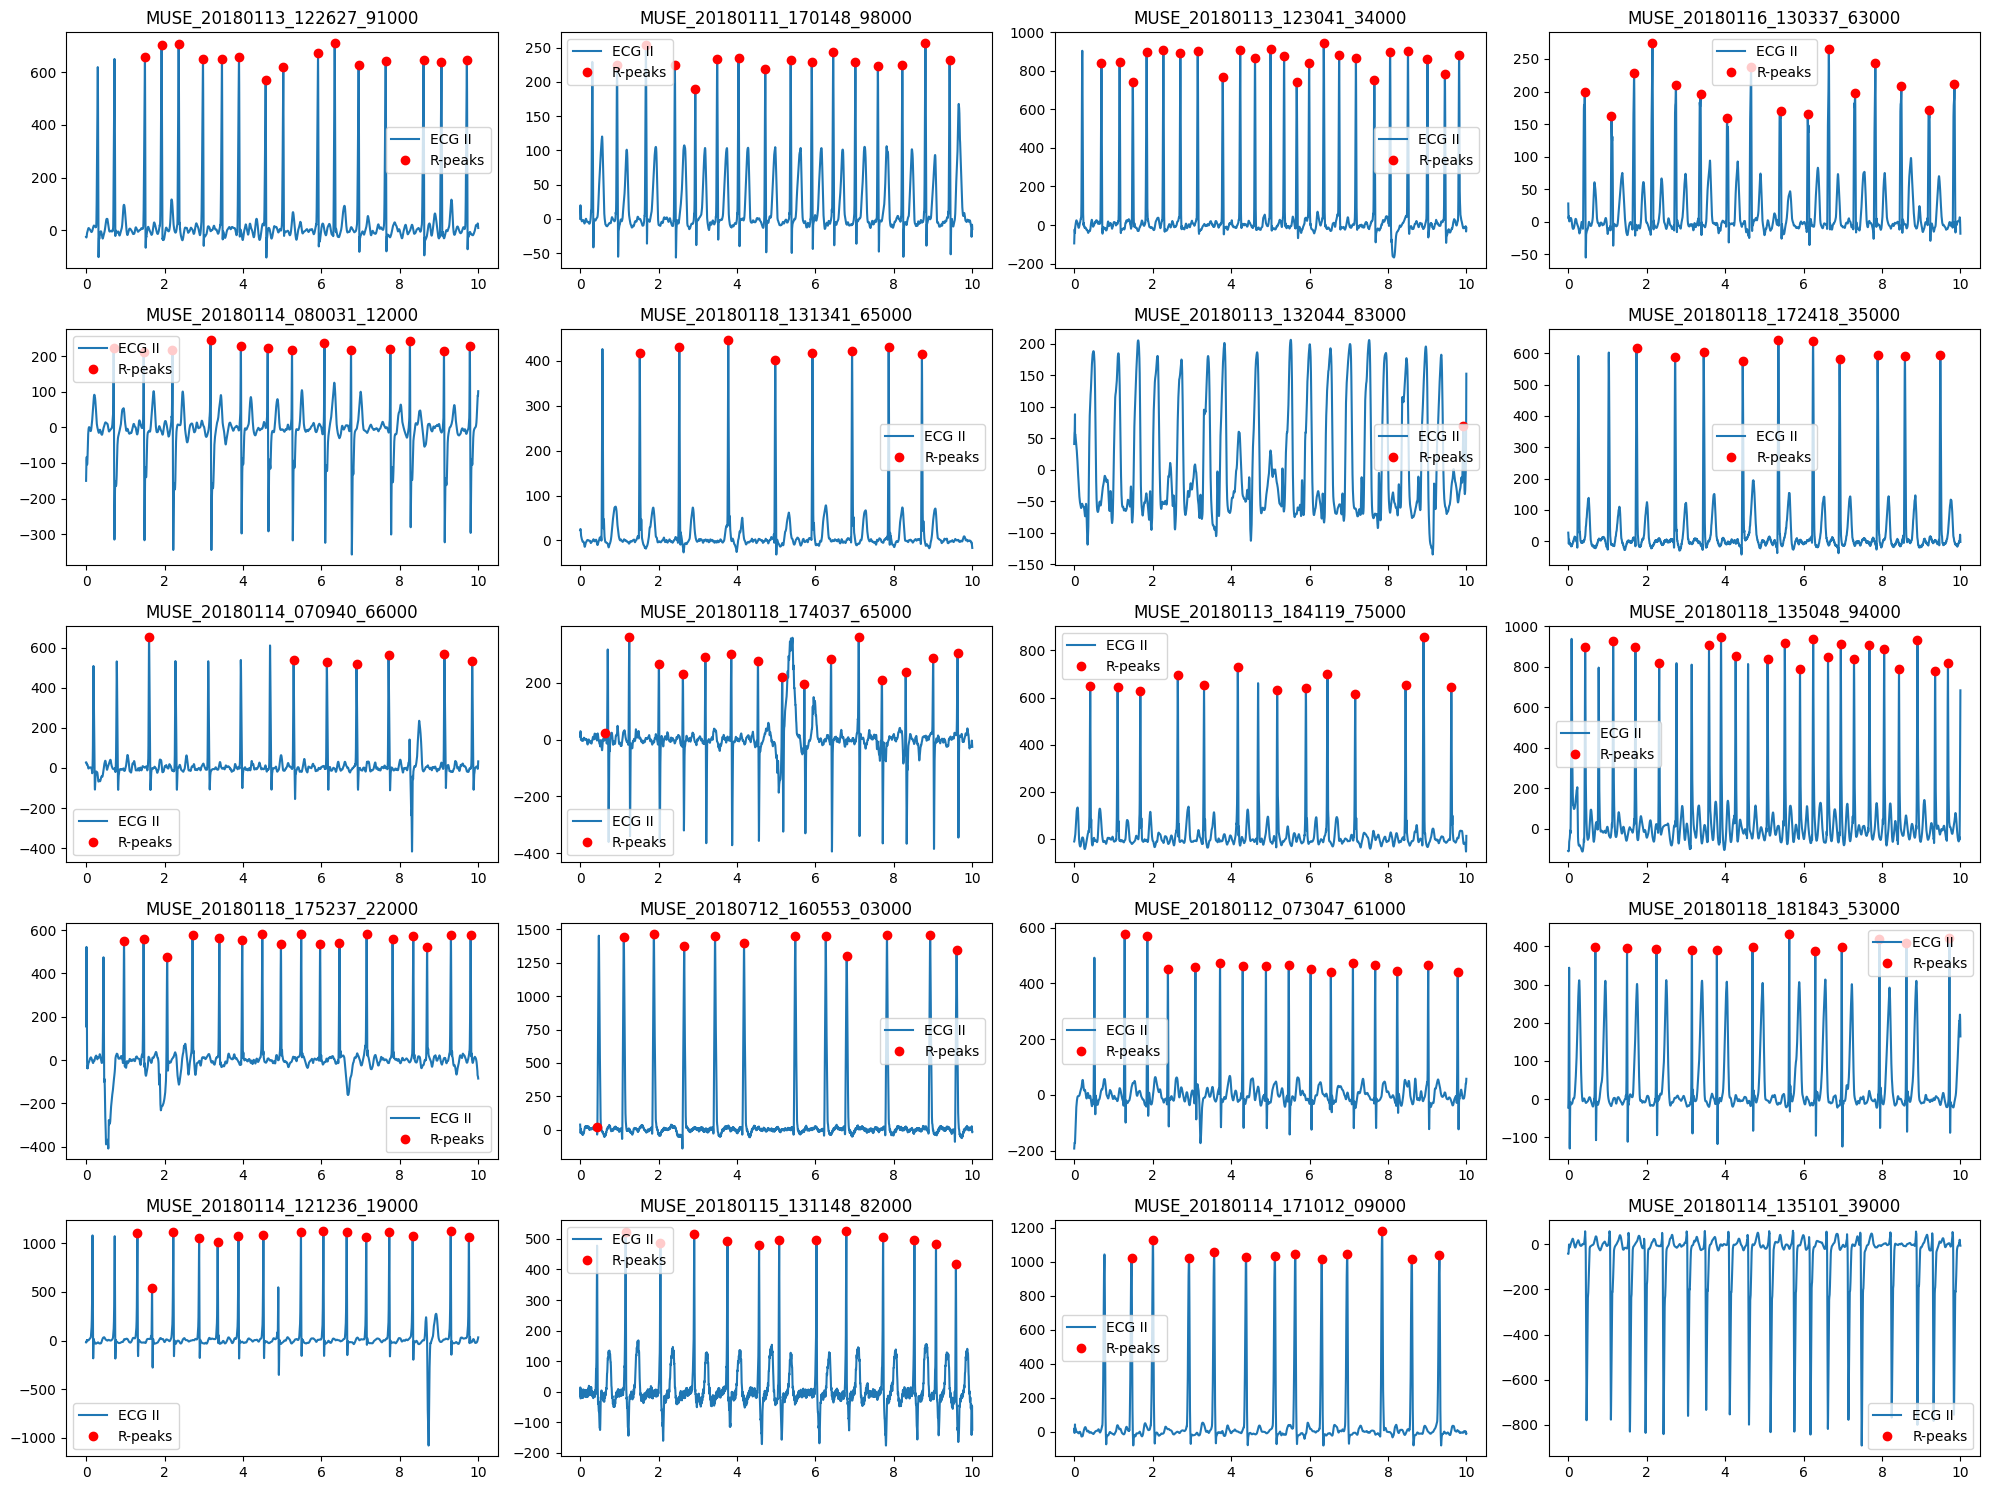

In [27]:
all_rpeaks1 = []  # Guardar los picos R de todos los archivos
fs = 500
num_signals = len(Nombres1)
cols = 4  # columnas de subplots
rows = int(np.ceil(num_signals / cols))  # número de filas

# Inicializar el detector Engzee
detectors = Detectors(fs)

fig, axs = plt.subplots(rows, cols, figsize=(20, rows * 3), sharex=False)
axs = axs.flatten()

for i in range(num_signals):
    try:
        senal = pd.read_csv(
            r'C:\Users\ctama\OneDrive\Desktop\Bioseñales\Proyecto\Datos\ECGDataDenoised\ECGDataDenoised\\' +
            Nombres1[i] + '.csv',
            delimiter=',',
            names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
        )
        signal_ekg = senal['II'].values
        tiempo = np.arange(0, len(signal_ekg) / fs, 1 / fs)

        # Detectar picos R usando Engzee
        rpeaks = detectors.engzee_detector(signal_ekg)
        all_rpeaks1.append(rpeaks)

        axs[i].plot(tiempo, signal_ekg, label='ECG II')
        axs[i].plot(tiempo[rpeaks], signal_ekg[rpeaks], 'ro', label='R-peaks')
        axs[i].set_title(Nombres1[i])
        axs[i].legend()

    except Exception as e:
        print(f"Error leyendo archivo: {Nombres1[i]} | {e}")
        axs[i].set_title(f"Error en {Nombres1[i]}")
        axs[i].axis('off')

# Ocultar subplots vacíos si hay menos de rows * cols
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

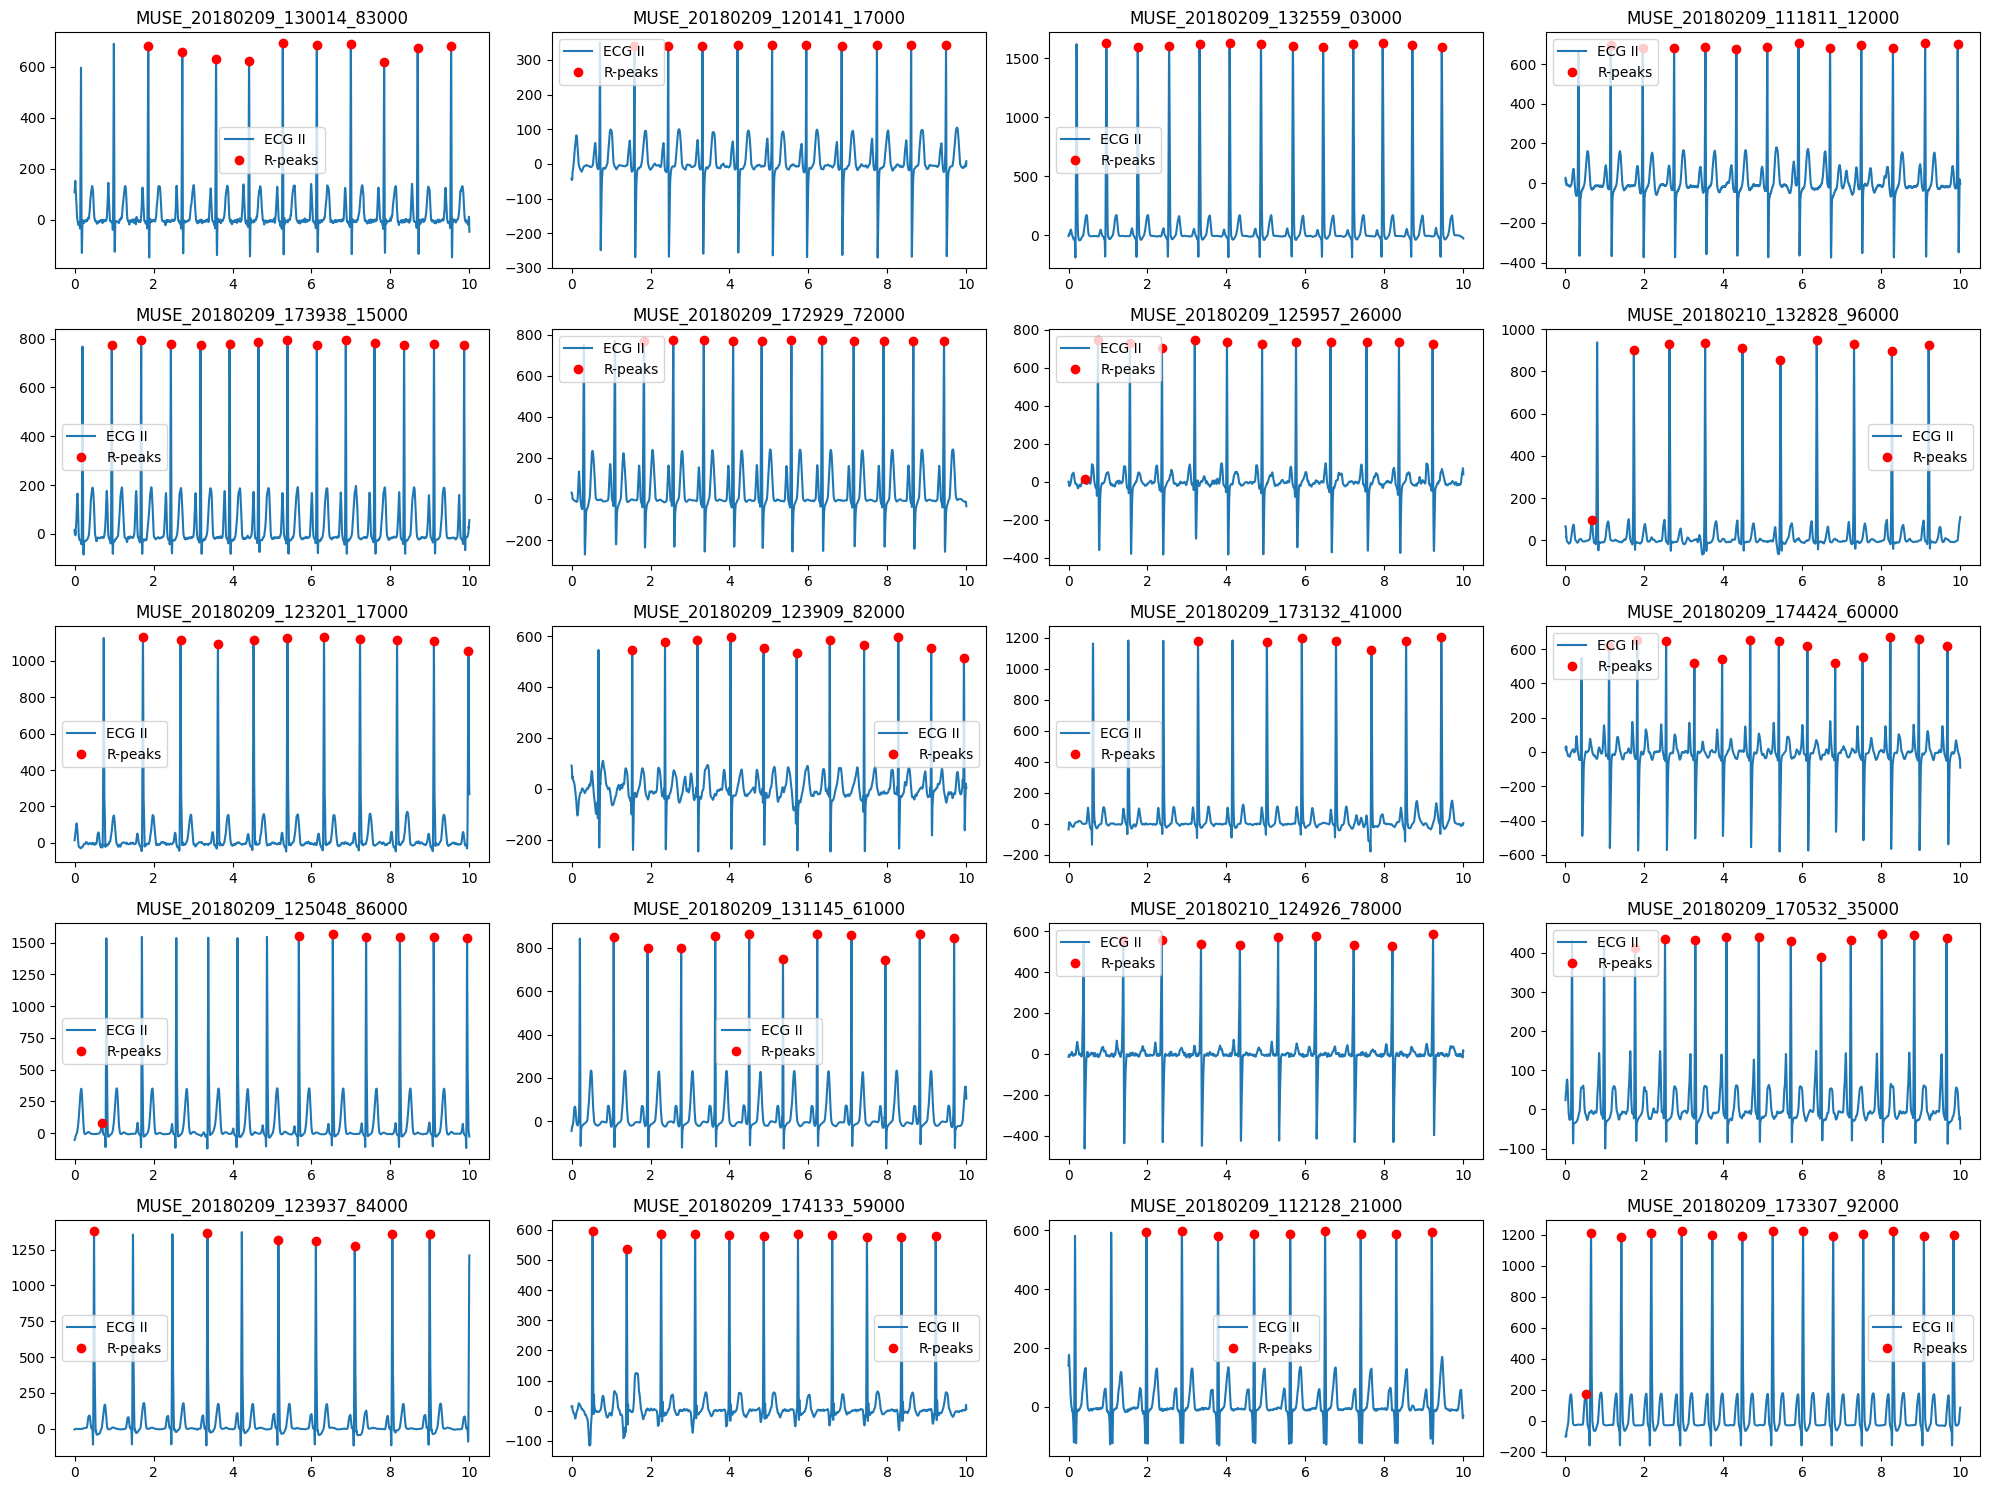

In [28]:
all_rpeaks1 = []  # Guardar los picos R de todos los archivos
fs = 500
num_signals = len(Nombres2)
cols = 4  # columnas de subplots
rows = int(np.ceil(num_signals / cols))  # número de filas

# Inicializar el detector Engzee
detectors = Detectors(fs)

fig, axs = plt.subplots(rows, cols, figsize=(20, rows * 3), sharex=False)
axs = axs.flatten()

for i in range(num_signals):
    try:
        senal = pd.read_csv(
            r'C:\Users\ctama\OneDrive\Desktop\Bioseñales\Proyecto\Datos\ECGDataDenoised\ECGDataDenoised\\' +
            Nombres2[i] + '.csv',
            delimiter=',',
            names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
        )
        signal_ekg = senal['II'].values
        tiempo = np.arange(0, len(signal_ekg) / fs, 1 / fs)

        # Detectar picos R usando Engzee
        rpeaks = detectors.engzee_detector(signal_ekg)
        all_rpeaks1.append(rpeaks)

        axs[i].plot(tiempo, signal_ekg, label='ECG II')
        axs[i].plot(tiempo[rpeaks], signal_ekg[rpeaks], 'ro', label='R-peaks')
        axs[i].set_title(Nombres2[i])
        axs[i].legend()

    except Exception as e:
        print(f"Error leyendo archivo: {Nombres2[i]} | {e}")
        axs[i].set_title(f"Error en {Nombres2[i]}")
        axs[i].axis('off')

# Ocultar subplots vacíos si hay menos de rows * cols
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

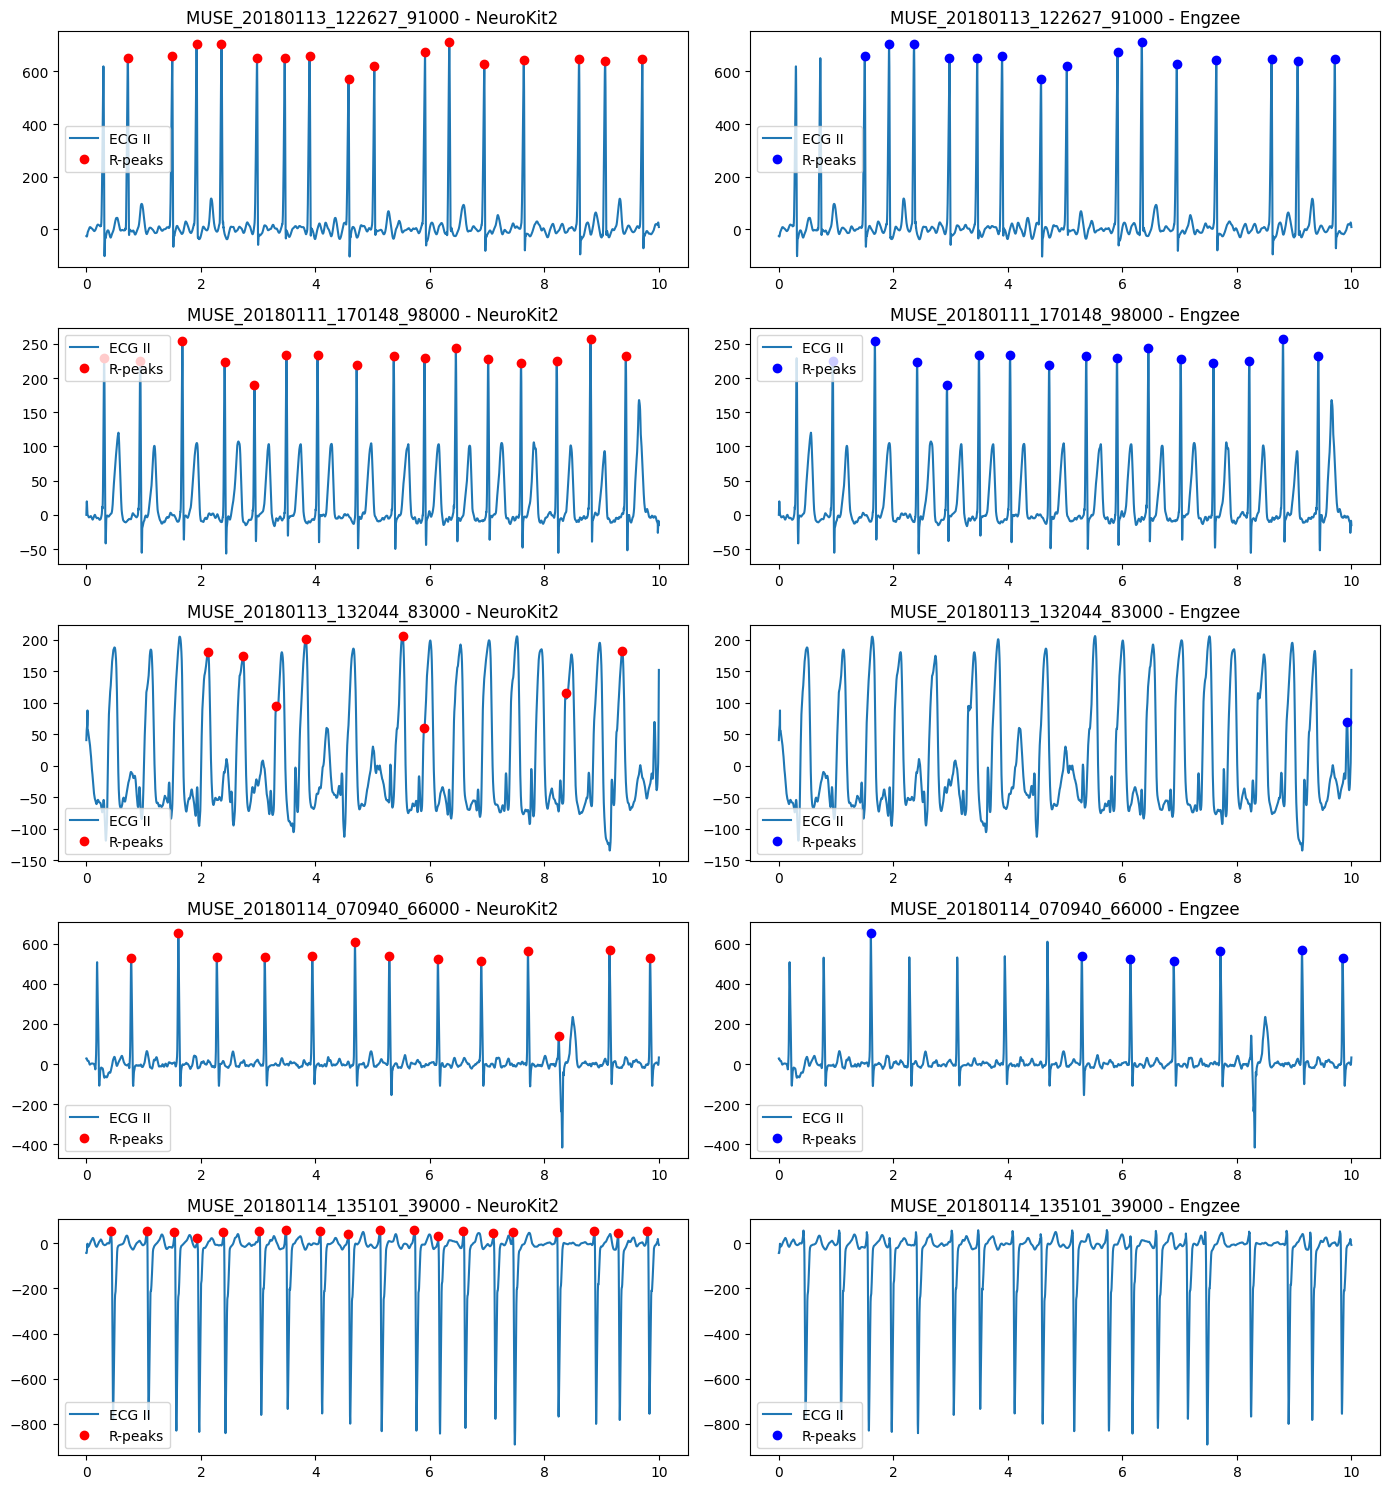

In [31]:
# Lista de índices de las señales que deseas analizar (ejemplo)
seleccion = [0,1, 6, 8, 19]  # Puedes modificar esta lista según tus necesidades

# Cálculo del número de filas para los subplots
num_signals = len(seleccion)
cols = 2  # Una columna para cada modelo
rows = int(np.ceil(num_signals))

# Creación de la figura y los subplots
fig, axs = plt.subplots(rows, cols, figsize=(14, 3 * rows), sharex=False)
axs = axs.reshape(rows, cols)  # Asegura que axs sea un arreglo 2D

for idx, i in enumerate(seleccion):
    try:
        # Lectura de la señal ECG desde el archivo CSV
        senal = pd.read_csv(
            f'C:\\Users\\ctama\\OneDrive\\Desktop\\Bioseñales\\Proyecto\\Datos\\ECGDataDenoised\\ECGDataDenoised\\{Nombres1[i]}.csv',
            delimiter=',',
            names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
        )
        signal_ekg = senal['II'].values
        tiempo = np.arange(0, len(signal_ekg) / fs, 1 / fs)

        # Detección de picos R con NeuroKit2
        _, rpeaks_nk = nk.ecg_peaks(signal_ekg, sampling_rate=fs, correct_artifacts=False, show=False)
        rpeaks_nk_idx = rpeaks_nk["ECG_R_Peaks"]

        # Detección de picos R con Engzee
        rpeaks_engzee_idx = detectors.engzee_detector(signal_ekg)

        # Graficar resultados de NeuroKit2
        axs[idx, 0].plot(tiempo, signal_ekg, label='ECG II')
        axs[idx, 0].plot(tiempo[rpeaks_nk_idx], signal_ekg[rpeaks_nk_idx], 'ro', label='R-peaks')
        axs[idx, 0].set_title(f'{Nombres1[i]} - NeuroKit2')
        axs[idx, 0].legend()

        # Graficar resultados de Engzee
        axs[idx, 1].plot(tiempo, signal_ekg, label='ECG II')
        axs[idx, 1].plot(tiempo[rpeaks_engzee_idx], signal_ekg[rpeaks_engzee_idx], 'bo', label='R-peaks')
        axs[idx, 1].set_title(f'{Nombres1[i]} - Engzee')
        axs[idx, 1].legend()

    except Exception as e:
        print(f"Error procesando archivo: {Nombres1[i]} | {e}")
        axs[idx, 0].set_title(f"Error en {Nombres1[i]}")
        axs[idx, 0].axis('off')
        axs[idx, 1].axis('off')

plt.tight_layout()
plt.show()

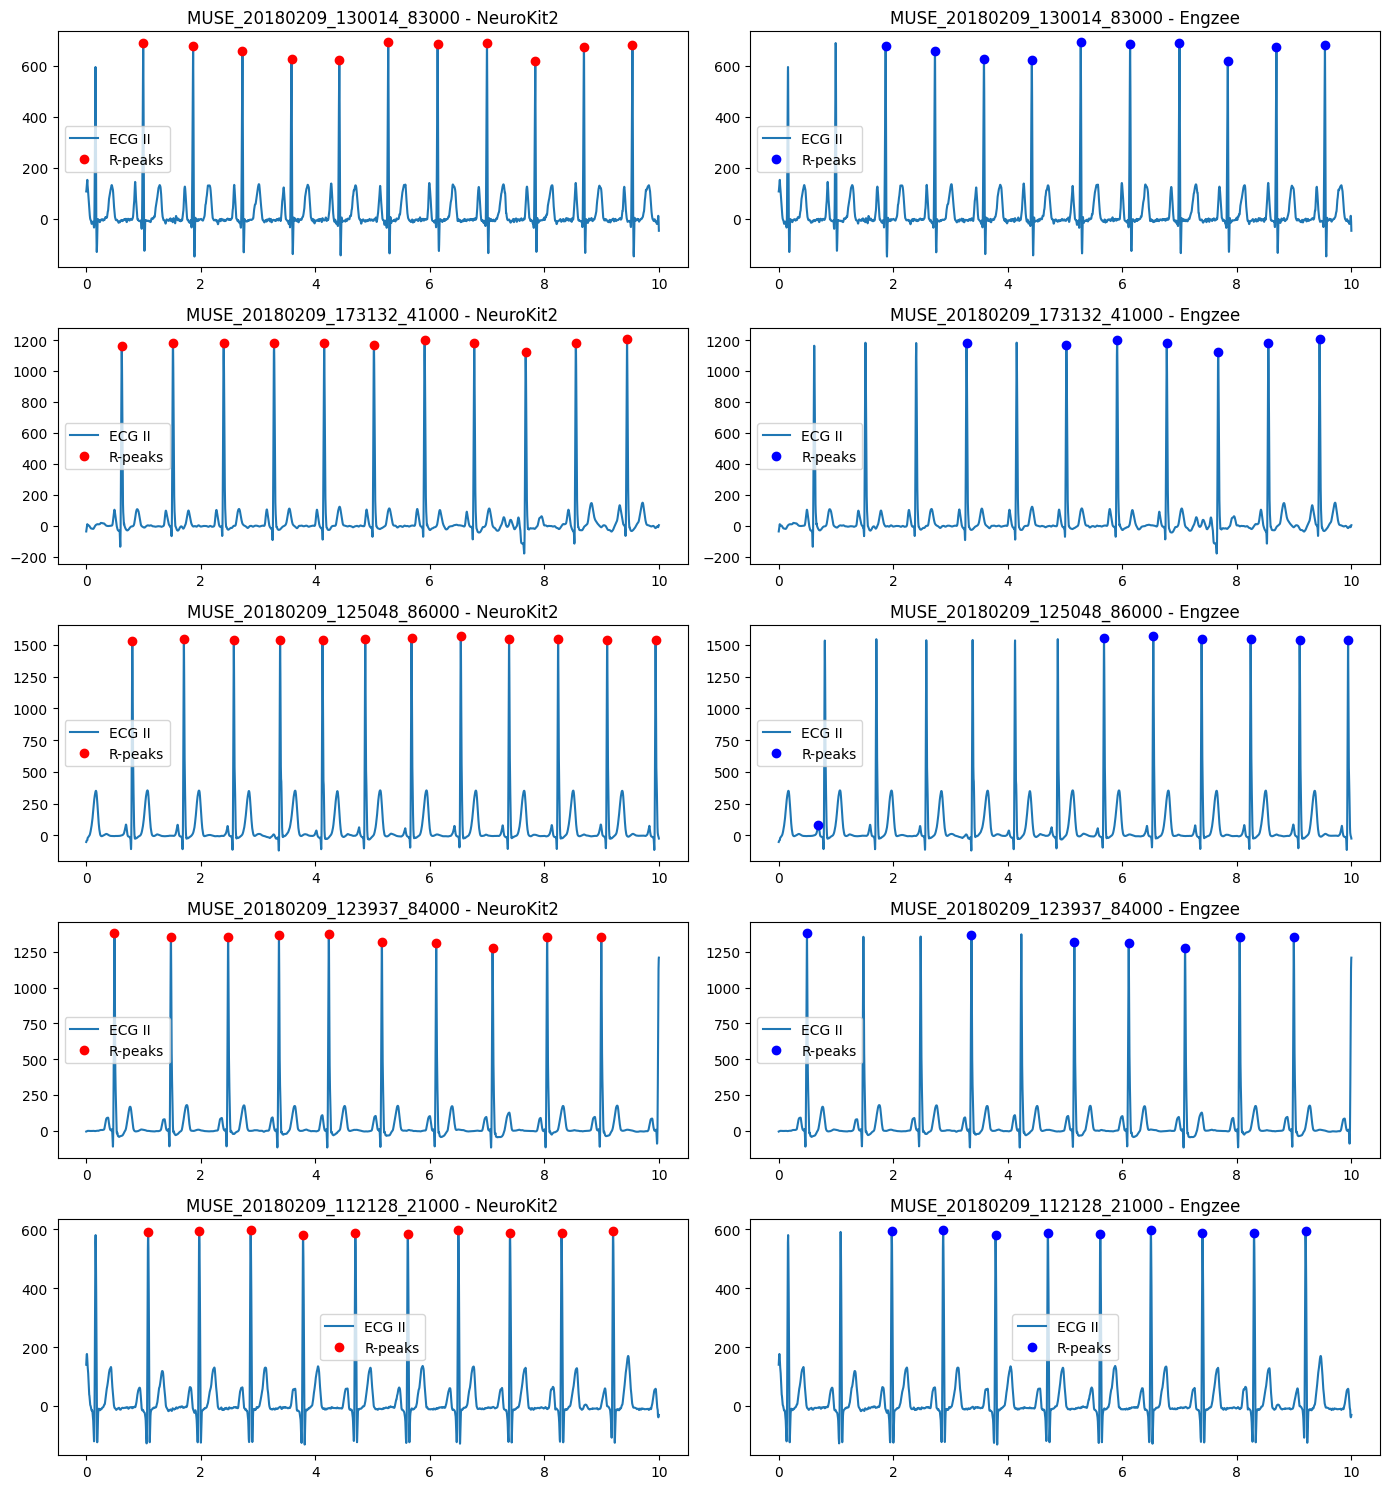

In [35]:
# Lista de índices de las señales que deseas analizar (ejemplo)
seleccion = [0,10, 12,16,18]  # Puedes modificar esta lista según tus necesidades

# Cálculo del número de filas para los subplots
num_signals = len(seleccion)
cols = 2  # Una columna para cada modelo
rows = int(np.ceil(num_signals))

# Creación de la figura y los subplots
fig, axs = plt.subplots(rows, cols, figsize=(14, 3 * rows), sharex=False)
axs = axs.reshape(rows, cols)  # Asegura que axs sea un arreglo 2D

for idx, i in enumerate(seleccion):
    try:
        # Lectura de la señal ECG desde el archivo CSV
        senal = pd.read_csv(
            f'C:\\Users\\ctama\\OneDrive\\Desktop\\Bioseñales\\Proyecto\\Datos\\ECGDataDenoised\\ECGDataDenoised\\{Nombres2[i]}.csv',
            delimiter=',',
            names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
        )
        signal_ekg = senal['II'].values
        tiempo = np.arange(0, len(signal_ekg) / fs, 1 / fs)

        # Detección de picos R con NeuroKit2
        _, rpeaks_nk = nk.ecg_peaks(signal_ekg, sampling_rate=fs, correct_artifacts=False, show=False)
        rpeaks_nk_idx = rpeaks_nk["ECG_R_Peaks"]

        # Detección de picos R con Engzee
        rpeaks_engzee_idx = detectors.engzee_detector(signal_ekg)

        # Graficar resultados de NeuroKit2
        axs[idx, 0].plot(tiempo, signal_ekg, label='ECG II')
        axs[idx, 0].plot(tiempo[rpeaks_nk_idx], signal_ekg[rpeaks_nk_idx], 'ro', label='R-peaks')
        axs[idx, 0].set_title(f'{Nombres2[i]} - NeuroKit2')
        axs[idx, 0].legend()

        # Graficar resultados de Engzee
        axs[idx, 1].plot(tiempo, signal_ekg, label='ECG II')
        axs[idx, 1].plot(tiempo[rpeaks_engzee_idx], signal_ekg[rpeaks_engzee_idx], 'bo', label='R-peaks')
        axs[idx, 1].set_title(f'{Nombres2[i]} - Engzee')
        axs[idx, 1].legend()

    except Exception as e:
        print(f"Error procesando archivo: {Nombres2[i]} | {e}")
        axs[idx, 0].set_title(f"Error en {Nombres2[i]}")
        axs[idx, 0].axis('off')
        axs[idx, 1].axis('off')

plt.tight_layout()
plt.show()

La principal diferencia entre las librerías NeuroKit2 y py-ecg-detectors está en la complejidad del modelo, la precisión y la variedad de funcionalidades.
py-ecg-detectors se enfoca exclusivamente en detectar picos R usando varios modelos, siendo el más efectivo el modelo Engzee. Sin embargo, incluso este modelo no alcanza la misma precisión que ofrece NeuroKit2.

Además, NeuroKit2 tiene muchas más funciones: no solo detecta los picos R, sino también las ondas P, Q, S y T, analiza intervalos importantes como PR, QT y ST, y no depende de librerías externas para graficar. Desde la misma función (activando show=True), puedes visualizar directamente los picos R.
También incluye herramientas avanzadas para el análisis de la variabilidad de la frecuencia cardíaca.